# Swing states

V případě amerických prezidentských voleb obecně platí, že ve většině států dlouhodobě vyhrávají kandidáti jedné strany. Například v Kalifornii vyhrává kandidát Demokratické strany or roku 1992, v Texasu kandidát Republikánské strany od roku 1980, v Kansasu do konce od roku 1968 atd. Státy, kde se vítězné strany střídají, jsou označovány jako "swing states" ("kolísavé státy"). Tvým úkolem je vybrat státy, které lze označit jako swing states.

V souboru [1976-2020-president.csv](1976-2020-president.csv) najdeš historické výsledky amerických prezidentských voleb. Každý řádek souboru obsahuje počet hlasů pro kandidáta dané strany v daném roce.

V souboru jsou důležité následující sloupce:

- `year` - rok voleb,
- `state` - stát,
- `party_simplified` - zjednodušené označení politické strany,
- `candidatevotes` - počet hlasů pro vybraného kandidáta,
- `totalvotes` - celkový počet odevzdaných hlasů.

Proveď níže uvedené úkoly.

1. Urči pořadí jednotlivých kandidátů v jednotlivých státech a v jednotlivých letech (pomocí metody `rank()`). Nezapomeň, že data je před použitím metody nutné seřadit a spolu s metodou `rank()` je nutné použít metodu `groupby()`.
1. Pro další analýzu jsou důležití pouze vítězové. Vytvoř novou tabulku, která bude obsahovat pouze vítěze voleb.
1. Pomocí metody `shift()` přidej nový sloupec, abys v jednotlivých řádcích měl(a) po sobě vítězné strany ve dvou po sobě jdoucích letech.
1. Porovnej, jestli se ve dvou po sobě jdoucích letech změnila vítězná strana. Můžeš k tomu použít např. funkci `numpy.where()` nebo metodu `apply()`.
1. Proveď agregaci podle názvu státu a seřaď státy podle počtu změn vítězných stran.
1. Vytvoř sloupcový graf s 10 státy, kde došlo k nejčastější změně vítězné strany. Jako výšku sloupce nastav počet změn.

Pro další část pracuj s tabulkou se dvěma nejúspěšnějšími kandidáty pro každý rok a stát (tj. s tabulkou, která oproti té minulé neobsahuje jen vítěze, ale i druhého v pořadí).

1. Přidej do tabulky sloupec, který obsahuje absolutní rozdíl mezi vítězem a druhým v pořadí.
1. Přidej sloupec s relativním marginem, tj. rozdílem vyděleným počtem hlasů.
1. Seřaď tabulku podle velikosti relativního marginu a zjisti, kdy a ve kterém státě byl výsledek voleb nejtěsnější.
1. Vytvoř pivot tabulku, která zobrazí pro jednotlivé volební roky, kolik států přešlo od Republikánské strany k Demokratické straně, kolik států přešlo od Demokratické strany k Republikánské straně a kolik států volilo kandidáta stejné strany.

## Nápovědy

Urči pořadí jednotlivých kandidátů v jednotlivých státech a v jednotlivých letech (pomocí metody `rank()`). Nezapomeň, že data je před použitím metody nutné seřadit a spolu s metodou `rank()` je nutné použít metodu `groupby()`.

*Řazení zde není nutné, ale pomůže to při kontrole, zda máme výpočet pořadí správně*

In [23]:
import pandas

data = pandas.read_csv("napovedy_01/ukol_01_napoveda_01.csv")
data.head(15)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,2.0
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER,3.0
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER,4.0
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER,5.0
5,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,1481,1182850,20210113,NaN,LIBERTARIAN,6.0
6,1976,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,NaN,True,308,1182850,20210113,NaN,OTHER,7.0
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT,2.0
9,1976,ALASKA,AK,2,94,81,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,6785,123574,20210113,NaN,LIBERTARIAN,3.0


Pro další analýzu jsou důležití pouze vítězové. Vytvoř novou tabulku, která bude obsahovat pouze vítěze voleb.

In [24]:
data = pandas.read_csv("napovedy_01/ukol_01_napoveda_02.csv")
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0
1,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0
2,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN,1.0
3,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,498604,767535,20210113,NaN,DEMOCRAT,1.0
4,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,3882244,7803770,20210113,NaN,REPUBLICAN,1.0


Pomocí metody `shift()` přidej nový sloupec, abys v jednotlivých řádcích měl(a) po sobě vítězné strany ve dvou po sobě jdoucích letech.

*Zde už je seřazení nutné. Ale pokud jsme data správně seřadili na začátku, nemusíme je řadit znovu, protože dotaz pouze vybere část řádků a pořadí nemění. Je tady navíc sloupec `previous_winner_party`. Pro rok 1976 je prázdný, protože starší data nemáme.*

In [25]:
data = pandas.read_csv("napovedy_01/ukol_01_napoveda_03.csv")
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,previous_winner_party
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,NaN
1,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT
2,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
3,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
4,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN


Porovnej, jestli se ve dvou po sobě jdoucích letech změnila vítězná strana. Můžeš k tomu použít např. funkci `numpy.where()` nebo metodu `apply()`.

*Pozor na to, aby se vám rok 1976 nezapočítal jako změna, protože předchozí data nemáme. Můžete to ošetřit ve své funkci nebo klidně rok 1976 vyřadit.*

In [26]:
data = pandas.read_csv("napovedy_01/ukol_01_napoveda_04.csv")
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,previous_winner_party,change
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,NaN,0
1,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT,1
2,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
3,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
4,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0


Proveď agregaci podle názvu státu a seřaď státy podle počtu změn vítězných stran. Zde je nápověda i s kódem. Abyste totiž mohli data sařadit, je nutné tabulku vytvořenou metodou `groupby` převést na klasickou tabulku. Použitím metody `groupby` vám totiž vznikne "groupovaná tabulka", která nejde řadit.

```
data_pivot = data.groupby(["state"])["change"].sum()
data_pivot = pandas.DataFrame(data_pivot)
data_pivot = data_pivot.sort_values("change", ascending=False)
```

Data můžete zkontrolovat na Wikipedii, třeba pro Ohio [zde](https://en.wikipedia.org/wiki/United_States_presidential_elections_in_Ohio).

In [27]:
data = pandas.read_csv("napovedy_01/ukol_01_napoveda_05.csv")
data.head(15)

,state,change
0,OHIO,5
1,FLORIDA,5
2,GEORGIA,4
3,WISCONSIN,4
4,IOWA,4
5,PENNSYLVANIA,4
6,NEVADA,3
7,TENNESSEE,3
8,LOUISIANA,3
9,KENTUCKY,3


Proveď agregaci podle názvu státu a seřaď státy podle počtu změn vítězných stran.

*Kód níže můžete ignorovat, důležitý je jen obrázek. Zde je podmínka na 10 států trochu nešikovná, protože států se 4 změnami je opravdu hodně, takže klidně můžete graf upravit, aby zobrazoval státy se 4 a více změnami (těch bude více než 10) nebo počítejte s tím, že můžete mít státy v grafu trochu jiné.*

<Axes: xlabel='state'>

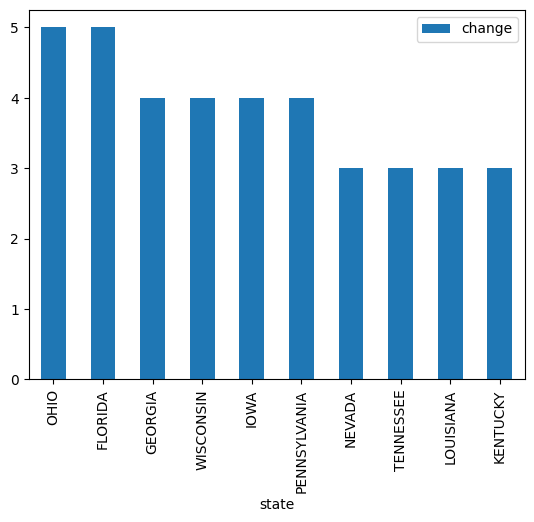

In [28]:
import matplotlib.pyplot as plt

data = data.set_index("state")
data = data.iloc[:10]
data.plot(kind="bar")

Přidej do tabulky sloupec, který obsahuje absolutní rozdíl mezi vítězem a druhým v pořadí.

*V kontrolní tabulce jsou opět jen vítězové, ale pro spočítání rozdílu musíte mít v datech i druhého v pořadí, použít metodu `shift()` a teprve potom můžete v tabulce ponechat jen vítěze.*

In [29]:
data = pandas.read_csv("napovedy_01/ukol_01_napoveda_06.csv")
data.head()

,level_0,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,second_candidate_votes,margin
0,0,0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,504070.0,155100.0
1,2,7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0,44058.0,27497.0
2,4,11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN,1.0,295602.0,123040.0
3,6,19,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,498604,767535,20210113,NaN,DEMOCRAT,1.0,267903.0,230701.0
4,8,23,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,3882244,7803770,20210113,NaN,REPUBLICAN,1.0,3742284.0,139960.0


Přidej sloupec s relativním marginem, tj. rozdílem vyděleným počtem hlasů.

In [30]:
data = pandas.read_csv("napovedy_01/ukol_01_napoveda_07.csv")
data.head()

,level_0,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,...,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,second_candidate_votes,margin,relative_margin
0,0,0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",...,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,504070.0,155100.0,0.131124
1,2,7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",...,False,71555,123574,20210113,NaN,REPUBLICAN,1.0,44058.0,27497.0,0.222514
2,4,11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",...,False,418642,742719,20210113,NaN,REPUBLICAN,1.0,295602.0,123040.0,0.165662
3,6,19,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"CARTER, JIMMY",...,False,498604,767535,20210113,NaN,DEMOCRAT,1.0,267903.0,230701.0,0.300574
4,8,23,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"FORD, GERALD",...,False,3882244,7803770,20210113,NaN,REPUBLICAN,1.0,3742284.0,139960.0,0.017935


Seřaď tabulku podle velikosti relativního marginu a zjisti, kdy a ve kterém státě byl výsledek voleb nejtěsnější.

*Nejmenší relativní rozdíl byl na Floridě v roce 2000. Možná si na to ještě vzpomínáte ze zpráv.*

In [31]:
data = pandas.read_csv("napovedy_01/ukol_01_napoveda_08.csv")
data.head()

,level_0,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,...,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,second_candidate_votes,margin,relative_margin
0,630,2106,2000,FLORIDA,FL,12,59,43,US PRESIDENT,"BUSH, GEORGE W.",...,False,2912790,5963110,20210113,NaN,REPUBLICAN,1.0,2912253.0,537.0,0.000090
1,674,2266,2000,NEW MEXICO,NM,35,85,66,US PRESIDENT,"GORE, AL",...,False,286783,598605,20210113,NaN,DEMOCRAT,1.0,286417.0,366.0,0.000611
2,866,2907,2008,MISSOURI,MO,29,43,34,US PRESIDENT,"MCCAIN, JOHN",...,False,1445814,2925205,20210113,NaN,REPUBLICAN,1.0,1441911.0,3903.0,0.001334
3,144,479,1980,MASSACHUSETTS,MA,25,14,3,US PRESIDENT,"REAGAN, RONALD",...,False,1057631,2524090,20210113,NaN,REPUBLICAN,1.0,1053802.0,3829.0,0.001517
4,74,241,1976,OREGON,OR,41,92,72,US PRESIDENT,"FORD, GERALD",...,False,492120,1029876,20210113,NaN,REPUBLICAN,1.0,490407.0,1713.0,0.001663


Vytvoř pivot tabulku, která zobrazí pro jednotlivé volební roky, kolik států přešlo od Republikánské strany k Demokratické straně, kolik států přešlo od Demokratické strany k Republikánské straně a kolik států volilo kandidáta stejné strany.

*Zde je lepší využít tabulku z předchozí části, kde už máme vítězné strany z minulého období. Poté je potřeba přidat nový sloupec, který porovná sloupec s vítěznou stranou daného roku a sloupec s vítěznou stranou z minulého roku. Opět pozor na rok 1976, aby vám neudělal neplechu. Rozlišujeme tři různé stavy: přechod od Republikánů k Demokratům, přechod od Demokratů k Republikánům a volba stejné strany.*

In [32]:
data = pandas.read_csv("napovedy_01/ukol_01_napoveda_09.csv")
data.head()

,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,previous_winner_party,change,swing
0,332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT,1,to Rep.
1,696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing
2,1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing
3,1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing
4,1674,1996,ALABAMA,AL,1,63,41,US PRESIDENT,"DOLE, ROBERT",REPUBLICAN,False,769044,1534349,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing


*Níže je výsledná pivot tabulka.*

In [33]:
data = pandas.read_csv("napovedy_01/ukol_01_napoveda_10.csv")
data

,year,no swing,to Dem.,to Rep.
0,1980,35.0,NaN,16.0
1,1984,45.0,NaN,6.0
2,1988,42.0,9.0,NaN
3,1992,29.0,22.0,NaN
4,1996,46.0,2.0,3.0
5,2000,40.0,NaN,11.0
6,2004,48.0,1.0,2.0
7,2008,42.0,9.0,NaN
8,2012,49.0,NaN,2.0
9,2016,45.0,NaN,6.0
